# Case LR: Como preditar o preço de um carro baseado nas suas características (variáveis)



### Suponha que um vendedor de carros usados tenha acabado de adquirir um carro novo. Como precificar esse produto, de maneira que seja justo tanto para ele quanto para um potencial cliente? (Vamos levar em conta que ele fez uma base de dados com os carros que ele já vendeu).


#### Prefácio: O recurso mais importante de uma empresa são os dados.

Uma das formas de abordar essa questão é usando análise preditiva: algoritmos para predição de resultados futuros com base em dados anteriores.

Como o que queremos preditar é o preço do carro, ou seja, uma variável numérica, o algoritmo utilizado será regressão linear. Vale ressaltar que existem outros tipos de algoritmos que poderiam ser utilizados:

*   Classificação 
*   Clustering (agrupamento) 



A técnica de regressão se baseia em encontrar uma função (no caso, polinômio) que melhor conecte os pontos de um gráfico. A dificuldade se dá então, em saber quais variáveis utilizar e qual o grau do polinômio que melhor se ajusta ao gráfico.

Nosso projeto será dividido em 5 etapas:

1 - Importação do dataset (conjunto de dados): No nosso caso, os dados estão armazenados em uma url, e precisam ser importados para o nosso notebook;

2 - Data wrangling: Processo de converter os dados do formato original para um formato mais apropriado para análises; 

3 - Análise exploratória de dados: Estudo dos dados adquiridos, antes de aplicar qualquer técnica, para o entendimento básico dos dados e das relações entre as variáveis;

4 - Desenvolvimento do modelo: Ajuda em preditar observações futuras a partir dos dados que temos. É somente uma previsão, mas ajuda a ter um insight;

5 -  Avaliação e refinamento do modelo: Verificar se o modelo desenvolvido é preciso e o que pode ser melhorado nele;

### Importação do dataset

Antes de mais nada, iremos importar as bibliotecas fundamentais para nossa análise:

In [ ]:
import matplotlib.pyplot as plt   # o as serve para abreviar a biblioteca nos códigos
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Os dados utilizados foram fornecidos no curso Certificado Profissional Ciência de dados da IBM. O link é fornecido abaixo:

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv

Iremos armazenar a url em uma variável:

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

Com a variável armazenada, iremos converter o arquivo .csv para um dataframe:

In [ ]:
df = pd.read_csv(url, header=None)    # colocar o parâmetro header porque o arquivo veio sem cabeçalho 

df.head()   # mostrar as 5 primeiras linhas

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Devemos adicionar cabeçalho ao dataframe:

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]   # criar uma lista com o cabeçalho de cada coluna

df.columns = headers    # colocar a lista como cabeçalho

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Nesse caso, os valores ausentes apareceram como ?, o que é inviável para análise. Por isso, esses valores serão substituídos por NaN (not a number):

In [ ]:
df = df.replace('?',np.NaN)   # substituir valores ? por NaN

df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


Como a variável que queremos preditar é o preço, linhas que possuam valor ausente para ela, não são significantes para nossa análise. Por isso, essas linhas serão excluídas, para não atrapalhar a análise:

In [ ]:
df = df.dropna(subset=['price'], axis=0)    # axis=0, pois o comando será aplicado para as linhas (colunas: axis=1)

df.head(10)   

# notar que a linha foi excluída e o índice 9 foi excluído também, o que será arrumado na próxima etapa

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


Com o dataframe inicial, podemos obter insights básicos:

In [ ]:
df.info()   # mostra o índice, tipo de dado, quantidade de valores não ausentes das colunas e memória usada para armazenar as informações

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

### Data wrangling

O primeiro passo será como lideramos com os valores ausentes. Já deletamos as linhas que possuiam a variável preço ausente, agora devemos lidar com as outras variáveis. Iremos fazer isso de duas formas: trocar os valores ausentes pela média dos valores, ou trocar os valores ausentes pelo valor mais frequente. 

Podemos ver a quantidade de valores ausentes de cada coluna:

In [ ]:
missing_data = df.notnull()   # valores ausentes como False

for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())    # valores ausentes aparecem como False
  print('')   # dar espaço entre cada valor das colunas

symboling
True    201
Name: symboling, dtype: int64

normalized-losses
True     164
False     37
Name: normalized-losses, dtype: int64

make
True    201
Name: make, dtype: int64

fuel-type
True    201
Name: fuel-type, dtype: int64

aspiration
True    201
Name: aspiration, dtype: int64

num-of-doors
True     199
False      2
Name: num-of-doors, dtype: int64

body-style
True    201
Name: body-style, dtype: int64

drive-wheels
True    201
Name: drive-wheels, dtype: int64

engine-location
True    201
Name: engine-location, dtype: int64

wheel-base
True    201
Name: wheel-base, dtype: int64

length
True    201
Name: length, dtype: int64

width
True    201
Name: width, dtype: int64

height
True    201
Name: height, dtype: int64

curb-weight
True    201
Name: curb-weight, dtype: int64

engine-type
True    201
Name: engine-type, dtype: int64

num-of-cylinders
True    201
Name: num-of-cylinders, dtype: int64

engine-size
True    201
Name: engine-size, dtype: int64

fuel-system
True    201
Name:

Como vimos anteriormente, temos dois problemas a serem resolvidos: variáveis com tipos de dados inapropriados e lidar com valores ausentes. Dessa forma,   iremos trocar os tipos de dados, e substituir os valores ausentes pela média, das seguintes colunas:

In [ ]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)   # calcular a média da coluna; axis=0 mostra que é para aplicar o comando na linha inteira

df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)    # trocar os valores ausentes (NaN) pela média da coluna

In [ ]:
avg_stroke = df['stroke'].astype('float').mean(axis=0)

df['stroke'].replace(np.nan, avg_stroke, inplace=True)

In [ ]:
avg_bore = df['bore'].astype('float').mean(axis=0)

df['bore'].replace(np.nan, avg_bore, inplace=True)

In [ ]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [ ]:
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Agora iremos trocar os valores ausentes pelo valor mais frequente da seguinte coluna:

In [ ]:
df['num-of-doors'].value_counts()    # mostra os valores e quantas vezes eles aparecem

#df['num-of-doors'].value_counts().idmax    # mostra o valor mais frequente

four    113
two      86
Name: num-of-doors, dtype: int64

In [ ]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

Como, quando excluímos as linhas com variável price ausente, os índices não resetaram, devemos resetá-los agora, para não ter índices faltando:

In [ ]:
df.reset_index(drop=True, inplace=True)   # reseta os índices

In [ ]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


Agora, devemos corrigir os formatos de dados, trocando os tipos de dados das colunas abaixo pelo mais apropriado:

In [ ]:
df[['bore', 'stroke', 'price', 'peak-rpm']] = df[['bore', 'stroke', 'price', 'peak-rpm']].astype("float")

df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Agora, iremos padronizar os dados, ou seja, transformar os dados em um formato comum, permitindo que possamos fazer comparações significativas. Nesse caso, iremos fazer a conversão de mpg para L/100 km, nas colunas abaixo:

In [ ]:
df['city-mpg'] = 235 / df['city-mpg']   # fazer a conversão (mpg = 235 / L/100km)

df.rename(columns={'city-mpg' : 'city-L/100km'}, inplace=True)    # renomear a coluna

In [ ]:
df['highway-mpg'] = 235 / df['highway-mpg']    # fazer a conversão (mpg = 235 / L/100km)

df.rename(columns={'highway-mpg' : 'highway-L/100km'}, inplace=True)    # renomear a coluna

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


O próximo processo será normalizar os dados, que é transformar valores de várias variáveis em um intervalo similar. Iremos normalizar as colunas length, width e height, para que os valores delas variem entre 0 e 1:

In [ ]:
df['length'] = df['length'] / df['length'].max()    # dividir o valor atual pelo valor máximo da coluna

df['width'] = df['width'] / df['width'].max()

df['height'] = df['height'] / df['height'].max()

In [ ]:
df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Agora, iremos para o processo de binning, ou seja, transformar variáveis numéricas contínuas em categóricas discretas para análises agrupadas.

No dataframe, horsepower é uma variável que varia de 48 a 288 com 59 valores únicos. Para a nossa análise, importará a diferença de preço entre carros com high horsepower, medium horsepower e little horsepower. Para isso, rearranjaremos a variável horsepower em 3 bins ('compartimentos') para simplificar análises:

In [ ]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)    # converter para o tipo de dado apropriado

In [ ]:
# fazer o binning agrupando em 3 categorias

bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)   # linspace(start_value, end_value, numbers_generated)
bins    # 3 bins são criados

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']   # nomes das categorias que o preço será dividido

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)   # função cut() determina qual categoria (group_names) 
                                                                                                    # o valor está 

In [ ]:
df['make'].value_counts()    # Ver o número de veículos em cada categoria

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

Por fim, iremos utilizar uma variável indicadora (dummy variable), que é usada para classificar categorias.

A coluna fuel-type tem dois valores únicos: gás ou diesel. Regressão não entende palavras, somente números. Para usar essa variável na análise de regressão, devemos converter fuel-type para variável indicadora:

In [ ]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])    # transformar os valores da coluna para variáveis indicadoras 

dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
dummy_variable_1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)   # mudar os nomes das colunas para facilitar
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df = pd.concat([df, dummy_variable_1], axis=1)    # fundir os dataframes df e dummy_variable_1 

df.drop('fuel-type', axis=1, inplace=True)    # deletar a coluna fuel-type do novo dataframe

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


Podemos repetir esse processo para a variável aspiration:

In [ ]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])   # criar a variável indicadora

dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)    # renomear as colunas

df = pd.concat([df, dummy_variable_2], axis=1)    # fundir os dataframes

df.drop('aspiration', axis=1, inplace=True)   # deletar a coluna aspiration

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


### Análise exploratória de dados


Nessa etapa, com o nosso dataframe devidamente e convenientemente formatado, podemos extrair alguns insights.

Podemos começar vendo a correlação entre todas as variáveis numéricas:

In [ ]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,0.066171,-0.029807,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.476153,0.577576,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,0.673363,0.736728,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,0.003811,0.084301,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.745059,0.783465,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.554726,0.559197,0.543154,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.036285,0.047199,0.082267,0.241033,-0.241033,-0.218190,0.218190


Como a nossa variável preditora é o preço, nos interessa saber as variáveis que mais se correlacionam com ela, sendo as mostradas abaixo:

In [ ]:
df[['price', 'wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km']].corr()[['price']]

,price
price,1.000000
wheel-base,0.584642
length,0.690628
width,0.751265
curb-weight,0.834415
engine-size,0.872335
horsepower,0.809729
city-L/100km,0.789898
highway-L/100km,0.801118


Podemos ver, também, a correlação entre as variáveis usando visualização de dados:

(0.0, 53091.55334854594)

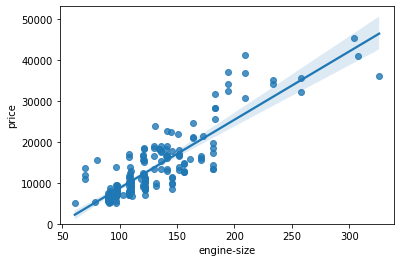

In [ ]:
import seaborn as sns

sns.regplot(x='engine-size', y='price', data=df)    
plt.ylim(0,)

# o gráfico mostra uma relação linear positiva, com a linha de regressão ajustada

(0.0, 47414.1)

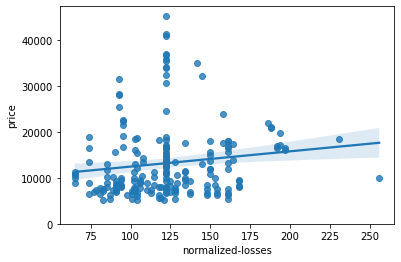

In [ ]:
sns.regplot(x='normalized-losses', y='price', data=df)    
plt.ylim(0,)

# o gráfico mostra uma relação linear fraca

Também podemos ver a relação das variáveis categóricas (que descrevem uma característica de uma unidade de dado) com o preço, usando boxplots:

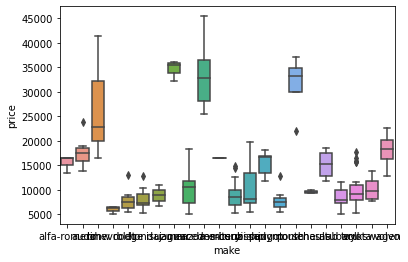

In [ ]:
sns.boxplot(x='make', y='price', data=df)

# drive-wheels é uma melhor variável preditora

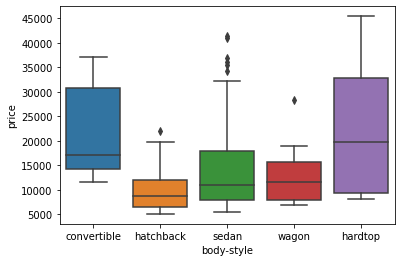

In [ ]:
sns.boxplot(x='body-style', y='price', data=df)

# body-style não é uma boa variável preditora

Podemos também agrupar variáveis categóricas, fazendo as combinações de seus valores, para saber o preço médio:

In [ ]:
df_gptest = df[['drive-wheels', 'body-style', 'price']]

grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [ ]:
# transformar esses dados agrupados em uma tabela pivot (planilha do Excel)

grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')   # drive-wheels será as linhas e body-style será as colunas

grouped_pivot = grouped_pivot.fillna(0)   # valores ausentes (NaN) serão substituídos por 0

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Para finalizarmos essa etapa, devemos conhecer dois coeficientes importantes:

Correlação de Pearson é um valor entre -1 e 1, onde:

*   -1 : correlação linear negativa perfeita
*   0 : nenhuma correlação linear (as duas variáveis não se influenciam)
*   1 : correlação linear positiva perfeita


Valor P é a probabilidade de que a correlação entre duas variáveis é estatisticamente significativo, onde:


*   <0,001: forte evidência de que a correlação é significativa
*   <0,05: moderada evidência de que a correlação é significativa  
*   <0,1: fraca evidência de que a correlação é significativa
*   Valores acima de 0,1: nenhuma evidência de que a correlação é significativa

Podemos obter esses dois coeficientes para as variáveis engine-size e price:

In [ ]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])

print(f'Correlação de Pearson: {pearson_coef}\n')

print(f'Valor P: {p_value}')

Correlação de Pearson: 0.8723351674455185

Valor P: 9.265491622198389e-64


### Desenvolvimento do modelo

A próxima etapa é desenvolver o modelo de regressão linear. Na etapa anterior, vimos as variáveis que mais influenciavam no preço do carro (variáveis preditoras) , e vamos trabalhar com elas para preditar o preço (variável alvo). O modelo resultante será uma função linear, ou seja, da forma Y = a + bX (X é a variável preditora e Y é a variável alvo)

Podemos fazer uma função para apenas uma variável, utilizando regressão linear simples:

In [ ]:
from sklearn.linear_model import LinearRegression   # importar o módulo de regressão linear

lm1 = LinearRegression()   # criar o objeto de regressão linear

X = df[['engine-size']]   # variável preditora
Y = df['price']    # variável alvo

lm1.fit(X,Y)   # treinar (fit) o modelo

Yhat1 = lm1.predict(X)    # fazer a predição

In [ ]:
print(Y[0:5])   # mostrar as 5 primeiras linhas da coluna preço
print('')
print(Yhat1[0:5])    # mostrar os 5 primeiros preços do modelo treinado levando em conta somente o engine-size


0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

[13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775]


In [ ]:
print(f'Coeficiente linear: {lm1.intercept_}\n')   # mostrar o coeficientre linear do modelo

print(f'Coeficiente angular: {lm1.coef_}')   # mostrar o coeficientre angular do modelo

Coeficiente linear: -7963.338906281042

Coeficiente angular: [166.86001569]


A função linear do modelo é:

**price** = -7963,34 + 166,86 x **engine-size**

Podemos fazer uma função para várias variáveis, utilizando regressão linear múltipla:

In [ ]:
lm2 = LinearRegression()    # criar o objeto de regressão linear

Z = df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km']]   # variáveis preditoras
Y = df['price']   # variável alvo

lm2.fit(Z, Y)   # treinar (fit) o modelo

Yhat2 = lm2.predict(Z)   # fazer a predição

In [ ]:
print(Y[0:5])   # mostrar as 5 primeiras linhas da coluna preço
print('')
print(Yhat2[0:5])    # mostrar os 5 primeiros preços do modelo treinado com as variáveis preditoras

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

[12594.2710274  12594.2710274  18554.34581324 11153.98740213
 16305.45542288]


In [ ]:
print(f'Coeficiente linear: {lm2.intercept_}\n')   # mostrar o coeficientre linear do modelo

print(f'Coeficiente angular: {lm2.coef_}')   # mostrar o coeficientre angular do modelo

Coeficiente linear: -47631.67729984435

Coeficiente angular: [ 1.23124276e+02 -1.92257452e+04  4.46586579e+04  2.28757383e+00
  9.08701919e+01  2.20461097e+01  1.09159129e+03 -8.21598140e+02]


A função linear do modelo é:

**price** = - 47631,68 + 123,12 x **wheel-base** - 19225,74 x **length** + 44658,66 x **width** + 2,29 x **curb-weight** + 90,87 x **engine-size**     + 22,05 x **horsepower** + 1091,59 x **city-L/100km** - 821,16 x **highway-L/100km**


Duas medidas importantes usadas em Estatística para determinar a precisão do modelo:


*   R-squared: indica o quão próximo o dado está da linha de regressão ajustada
*   Mean Squared Error (MSE): indica a média da raiz quadrada dos erros (a diferença entre o valor real Y e o valor estimado Yhat)

Um bom modelo possui:


*   Maior R-squared
*   Menor MSE


Podemos avaliar a precisão dos nossos dois modelos:

In [ ]:
# para a regressão linear simples

from sklearn.metrics import mean_squared_error    # importar o módulo para calcular o MSE

print(f'R-squared: {lm1.score(X,Y)}')    # mostrar o R-squared
print('')
print(f'MSE: {mean_squared_error(Y, Yhat1)}')   # mostrar o MSE

R-squared: 0.7609686443622008

MSE: 15021126.025174143


In [ ]:
# para a regressão linear múltipla

from sklearn.metrics import mean_squared_error    # importar o módulo para calcular o MSE

print(f'R-squared: {lm2.score(Z,Y)}')    # mostrar o R-squared
print('')
print(f'MSE: {mean_squared_error(Y, Yhat2)}')   # mostrar o MSE

R-squared: 0.8243801328385095

MSE: 11036243.132697735


Os modelos nos dão uma noção do preço que o vendedor pode pedir pelo carro, baseado nas variáveis preditoras:

In [ ]:
# para a regressão linear simples

engine_size = 100   # escrever o valor da variável

price = -7963.34 + 166.86 * engine_size

print(f'Preço: R${price:.2f}')

Preço: R$8722.66


In [ ]:
# para a regressão linear múltipla

wheel_base = 94.5   # escrever o valor da variável

length = 0.82   # escrever o valor da variável

width = 0.91    # escrever o valor da variável

curb_weight = 2823     # escrever o valor da variável

engine_size = 152    # escrever o valor da variável

horsepower = 154   # escrever o valor da variável

city_Lcemkm = 12.37   # escrever o valor da variável

highway_Lcemkm = 9.03    # escrever o valor da variável

price = - 47631.68 + 123.12 * wheel_base - 19225.74 * length + 44658.66 * width + 2.29 * curb_weight + 90.87 * engine_size + 22.05 * horsepower + 1091.59 * city_Lcemkm - 821.16 * highway_Lcemkm

print(f'Preço: R${price:.2f}')

Preço: R$18637.94


### Avaliação e refinamento do modelo

Podemos melhorar nossos modelos treinados, dividindo nossos dados em dois grupos: treino (usado para treinar o modelo) e teste (usado para testar o modelo).

In [ ]:
y_data1 = df['price']    # separar a variável em um dataframe só com ela

x_data = df.drop('price', axis=1)   # deletar a variável alvo do dataframe original

In [ ]:
# dividir os dados aleatoriamente para treino e para teste

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data1, test_size=0.3, random_state=1)    # test_size é para a proporção de dado de teste

print(f'Número de dados de treino: {x_train.shape[0]}\n')

print(f'Número de dados de teste: {x_test.shape[0]}')

Número de dados de treino: 140

Número de dados de teste: 61


Com os dados divididos para treio e para teste, podemos fazer novos modelos e compará-los com os anteriores.

Para a regressão linear simples:

In [ ]:
from sklearn.linear_model import LinearRegression

lre1 = LinearRegression()    # criar o objeto de regressão linear

lre1.fit(x_train[['engine-size']], y_train)   # treinar o modelo com a variável preditora engine-size

LinearRegression()

In [ ]:
print('R-squred dos dados de treino:', lre1.score(x_train[['engine-size']], y_train))

print('R-squred dos dados de teste:', lre1.score(x_test[['engine-size']], y_test)) 

R-squred dos dados de treino: 0.783075073072774
R-squred dos dados de teste: 0.6887892619732785


In [ ]:
print(f'Coeficiente linear: {lre1.intercept_}\n')   # mostrar o coeficientre linear do modelo

print(f'Coeficiente angular: {lre1.coef_}')   # mostrar o coeficientre angular do modelo

Coeficiente linear: -7918.3796454663625

Coeficiente angular: [166.73419618]


Dessa forma, a nossa função linear para o modelo é:

**price** = -7789,15 + 166,58 x **engine-size**

Para a regressão linear múltipla:

In [ ]:
lre2 = LinearRegression()    # criar o objeto de regressão linear

lre2.fit(x_train[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km']], y_train)   # treinar o modelo com as variáveis preditoras 

LinearRegression()

In [ ]:
print('R-squred dos dados de treino:', lre2.score(x_train[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km']], y_train))

print('R-squred dos dados de teste:', lre2.score(x_test[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-L/100km', 'highway-L/100km']], y_test)) 

R-squred dos dados de treino: 0.8322130941791972
R-squred dos dados de teste: 0.783965944591674


In [ ]:
print(f'Coeficiente linear: {lre2.intercept_}\n')   # mostrar o coeficientre linear do modelo

print(f'Coeficiente angular: {lre2.coef_}')   # mostrar o coeficientre angular do modelo

Coeficiente linear: -39154.57269864552

Coeficiente angular: [ 1.02509818e+02 -1.34713536e+04  3.31484583e+04  1.00973095e+00
  1.09382782e+02  1.72268366e+01  1.35178588e+03 -1.05497241e+03]


Dessa forma, a nossa função linear para o modelo é:

**price** = - 34483,48 + 144,08 x **wheel-base** - 15944,47 x **length** + 24729,67 x **width** + 1,36 x **curb-weight** + 106,58 x **engine-size** + 15,12 x **horsepower** + 1490,02 x **city-L/100km** - 1137,61 x **highway-L/100km**


Novamente, os modelos nos dão uma noção do preço que o vendedor pode pedir pelo carro, baseado nas variáveis preditoras:

In [ ]:
# para a regressão linear simples

engine_size = 154   # escrever o valor da variável

price = -7789.15 + + 166.58 * engine_size 

print(f'Preço: R${price:.2f}')

Preço: R$17864.17


In [ ]:
# para a regressão linear múltipla

wheel_base = 94.5   # escrever o valor da variável

length = 0.82   # escrever o valor da variável

width = 0.91    # escrever o valor da variável

curb_weight = 2823     # escrever o valor da variável

engine_size = 152    # escrever o valor da variável

horsepower = 154   # escrever o valor da variável

city_Lcemkm = 12.37   # escrever o valor da variável

highway_Lcemkm = 9.03    # escrever o valor da variável

price = - 34483.48 + 144.08 * wheel_base - 15944.47 * length + 24729.67 * width + 1.36 * curb_weight + 106.58 * engine_size + 15.12 * horsepower + 1490.02 * city_Lcemkm - 1137.61 * highway_Lcemkm

print(f'Preço: R${price:.2f}')

Preço: R$19088.46


### Considerações finais

* A precisão dos nossos modelos foi satisfatória e dentro do intervalo esperado;

* Essa solução utilizou apenas as variáveis numéricas que mais se correlacionavam com o preço, sendo uma de muitas soluções com o uso de algoritmos de machine learning;

* Houve overfitting no refinamento do modelo, há formas de solucionar esse problema (mudando a proporção de dados para treino e para teste, usando mais variáveis preditoras, aumentando a base de dados, ...);

* Para aumentar a confiabilidade do modelo, deve-se aumentar a base de dados; 

* O vendedor consegue ter uma noção do preço que pode pedir pelo carro, mesmo com uma base de dados pequena e utilizando um algoritmo extremamente simples de machine learning e sem muito refinamento, apresentando uma boa solução para o case proposto.